In [8]:
###LOAD DATA###

In [20]:
import pandas as pd

In [21]:
data=pd.read_csv('data/inventory_data.csv')

In [22]:
###EXPLORING DATA###

In [23]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [25]:
print(data.describe())
print(len(data))

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
541909


In [26]:
###HANDLE MISSING VALUES###

In [27]:
data.isnull().sum()
data=data.dropna()
print(len(data))

406829


In [28]:
###DATA CLEANING AND PREPROCESSING###

In [47]:
### We take the date from the data toextract important statistics. So we ensure date column is in correct datetime format ###
# Convert the InvoiceDate column to datetime format
#data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format="%d-%m-%Y %H:%M", errors='coerce')
# Handle missing values that might result from parsing errors
#data = data.dropna(subset=['InvoiceDate'])
# Verify the conversion
#print(data['InvoiceDate'].head())

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format="%d-%m-%Y %H:%M", errors='coerce')
data = data.dropna(subset=['InvoiceDate'])
print(data['InvoiceDate'].head())

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [48]:
### Extract useful features from the date column ###
data['Month']=data['InvoiceDate'].dt.month
data['Year']=data['InvoiceDate'].dt.year
data['Day']=data['InvoiceDate'].dt.day

In [49]:
### Let us find monthly stock levels by aggregating the monthly sales data for each product ###
monthly_stocks=data.groupby(['Year','Month','StockCode'])['Quantity'].sum().reset_index()
print(monthly_stocks)

       Year  Month StockCode  Quantity
0      2010     12     10002       224
1      2010     12     10120        16
2      2010     12    10123C         1
3      2010     12    10124A         4
4      2010     12    10124G         5
...     ...    ...       ...       ...
30613  2011     12      CRUK        -1
30614  2011     12         D        -1
30615  2011     12       DOT         1
30616  2011     12         M       795
30617  2011     12      POST       120

[30618 rows x 4 columns]


In [50]:
###DATA ANALYSIS AND VISUALIZATION###

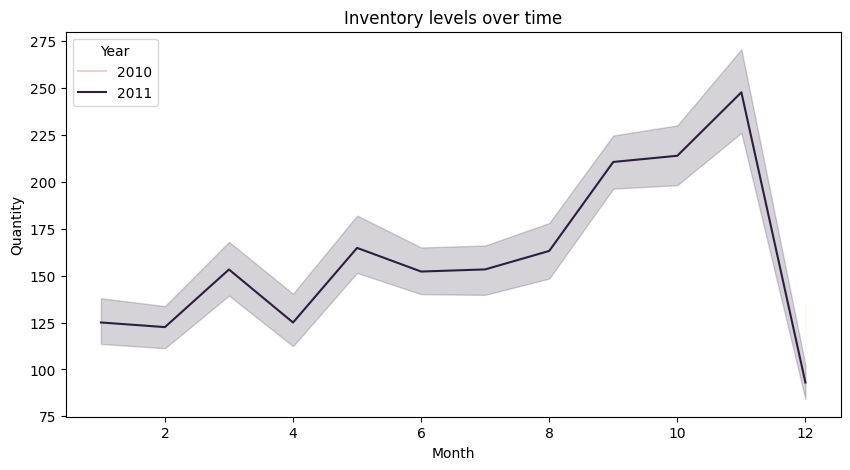

In [51]:
### Plotting graph that shows inventory levels over time ###
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_stocks,x="Month",y="Quantity",hue="Year")
plt.title("Inventory levels over time")
plt.show()

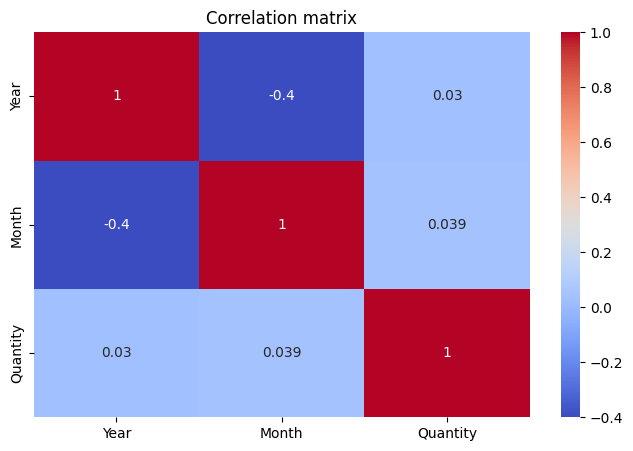

In [52]:
### Correlation Relationship between features###
### Correlation function in pandas (corr()) expects all columns to be numeric. 
### However, your dataset contains non-numeric columns, such as product IDs or names, which cannot be converted to float values.
### To perform correlation analysis, you need to ensure that only numeric columns are used
import numpy as np
#Select numeric columns for correlation analysis 
numeric_cols = monthly_stocks.select_dtypes(include=[np.number]).columns
corr_matrix = monthly_stocks[numeric_cols].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

In [53]:
###PREDICTIVE MODELING###

In [54]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Aggregate data by month
monthly_data = data.set_index('InvoiceDate').resample('MS')['Quantity'].sum()

In [63]:
# Perform the Augmented Dickey-Fuller test
result = adfuller(monthly_data.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value is greater than 0.05, apply differencing
if result[1] > 0.05:
    monthly_data_diff = monthly_data.diff().dropna()
else:
    monthly_data_diff = monthly_data

ADF Statistic: -1.5392062222637029
p-value: 0.5140351882093729


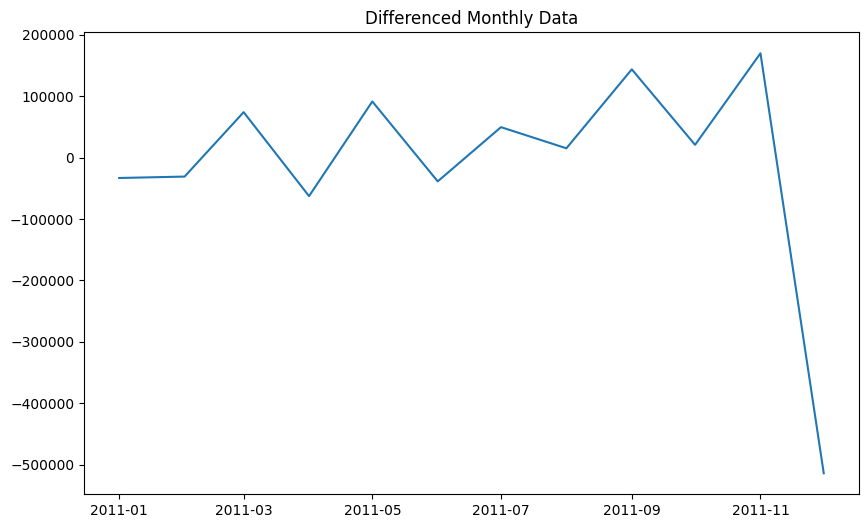

In [64]:
# Plot the differenced data to check for stationarity visually
plt.figure(figsize=(10, 6))
plt.plot(monthly_data_diff)
plt.title('Differenced Monthly Data')
plt.show()

In [65]:
# Train the ARIMA model on differenced data
model = ARIMA(monthly_data_diff, order=(5, 1, 0))  # Adjust the order as needed
model_fit = model.fit()

C:\Users\Mahathi Mandelli\Desktop\data-driven-inventory-optimization\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [66]:
# Make predictions
forecast = model_fit.get_forecast(steps=12)  # Forecasting the next 12 months
forecast_index = pd.date_range(start=monthly_data.index[-1], periods=13, freq='MS')[1:]
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

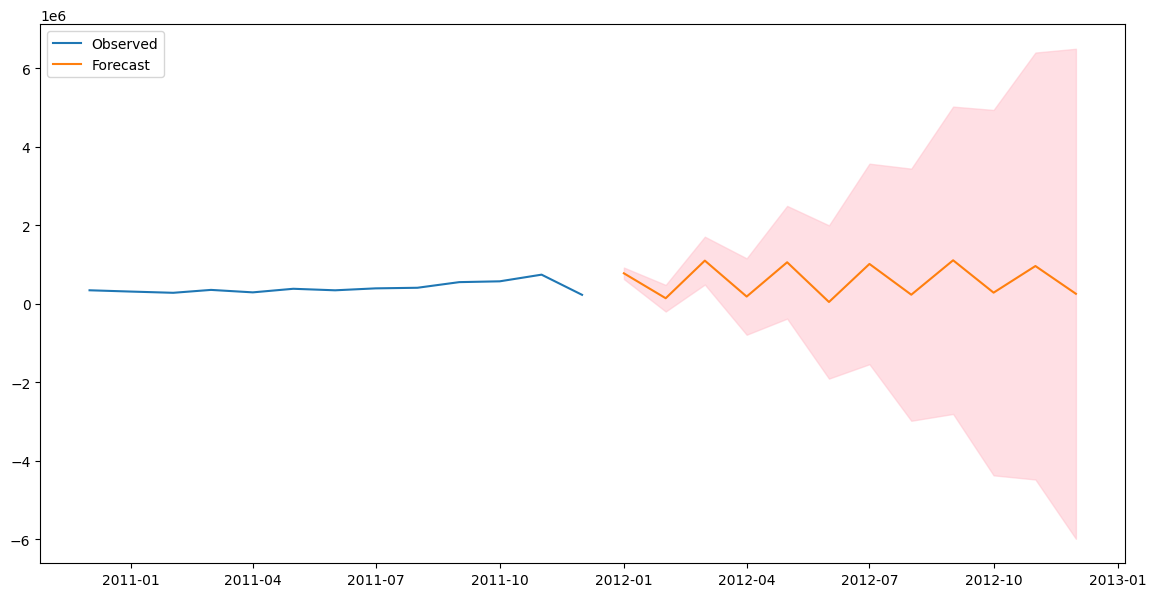

In [67]:
# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(monthly_data, label='Observed')
plt.plot(forecast_index, forecast_values.cumsum() + monthly_data.iloc[-1], label='Forecast')  # Use cumsum to reverse differencing
plt.fill_between(forecast_index, (forecast_conf_int.iloc[:, 0].cumsum() + monthly_data.iloc[-1]), (forecast_conf_int.iloc[:, 1].cumsum() + monthly_data.iloc[-1]), color='pink', alpha=0.5)
plt.legend()
plt.show()

In [68]:
print("\n=== Descriptive Output ===\n")

# Augmented Dickey-Fuller Test Results
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("The time series is non-stationary and differencing was applied.")
else:
    print("The time series is stationary.")

print("\nDifferenced Data Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result_diff[0]}")
print(f"p-value: {result_diff[1]}")
if result_diff[1] > 0.05:
    print("The differenced time series is still non-stationary.")
else:
    print("The differenced time series is stationary.")

# Model Summary
print("\nARIMA Model Summary:")
print(model_fit.summary())

# Forecast Summary
print("\nForecast Summary:")
forecast_summary = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': forecast_cumsum,
    'Lower CI': forecast_conf_int.iloc[:, 0].cumsum() + monthly_data.iloc[-1],
    'Upper CI': forecast_conf_int.iloc[:, 1].cumsum() + monthly_data.iloc[-1]
})
print(forecast_summary)

print("\nThe forecasted values for the next 12 months are displayed along with the 95% confidence intervals.")


=== Descriptive Output ===

Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.5392062222637029
p-value: 0.5140351882093729
The time series is non-stationary and differencing was applied.

Differenced Data Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.9126599221151297
p-value: 0.3261291215843045
The differenced time series is still non-stationary.

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   12
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -154.118
Date:                Sat, 13 Jul 2024   AIC                            320.236
Time:                        00:08:14   BIC                            322.623
Sample:                    01-01-2011   HQIC                           318.731
                         - 12-01-2011                                         
Covariance Type:                  opg                      